Призываем демонов и произносим магическое заклинание для быстрого изображения графиков:

In [2]:
import numpy as np # математика: косинусы и прочие
import pandas as pd # обработка данных
import seaborn as sns # графики
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

Решаем задачу тремя способами. Первый — точный. Находим $P(X>65)$ для биномиальной Bin(n=100, p=0.5):

In [3]:
1 - stats.binom.cdf(65, n=100, p=1/2)

0.00089496519574339128

Для любопытства посмотрим на ожидание и дисперсию:

In [5]:
Y = stats.binom(n=100, p=1/2)

In [6]:
Y.expect()

49.99999999999855

In [7]:
Y.var()

25.0

Второй способ. Генерируем много-много значений и смотрим, сколько оказалось больше 65.

Генерируем 10^7 значений

In [16]:
values = Y.rvs(10000000)

Смотрим на первые 10 значение:

In [9]:
values[0:10]

array([54, 51, 44, 50, 48, 53, 56, 44, 48, 54])

Гистограмму в студию:

/Users/boris/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


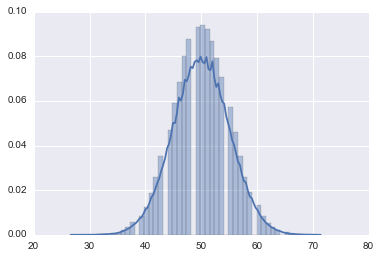

In [12]:
sns.distplot(values)

Количество значений больше 65:

In [13]:
np.sum(values > 65)

96

Доля значений, оценка для вероятности $P(Y>65)$:

In [17]:
np.sum(values > 65) / 10 ** 7

0.00090019999999999998

In [18]:
Y.expect()

49.99999999999855

In [19]:
Y.var()

25.0

In [21]:
1 - stats.norm.cdf(3)

0.0013498980316301035

In [22]:
1 - stats.norm.cdf(65, loc=50, scale=5)

0.0013498980316301035

Создаём новую функцию:

In [23]:
def my_fun(x):
    return x **2


Тестируем новую функцию:

In [24]:
my_fun(5)

25

In [27]:
def dydt(y, t):
    r, f = y
    return [r - 0.1 * r * f, -1.5 * f + 0.08 * r * f]


Тестируем функцию для подсчёта производных:

In [26]:
dydt([10, 7], 5)

[3.0, -4.8999999999999995]

Начальные условия для дифференциального уравнения:

In [28]:
y0 = [10, 7]

Задаём ось времени:

In [30]:
time = np.arange(start=0, stop=10, step=0.5)

In [31]:
time

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

Импортируем функцию для решения дифференциального уравнения:

In [32]:
from scipy.integrate import odeint

Решаем!

In [33]:
y = odeint(dydt, y0, time)

In [34]:
y

array([[ 10.        ,   7.        ],
       [ 12.23004911,   5.13255168],
       [ 16.00919283,   4.2415852 ],
       [ 21.44606236,   4.21508486],
       [ 28.01569671,   5.34769501],
       [ 32.93782769,   8.67081381],
       [ 30.32052215,  15.01072824],
       [ 20.47146214,  19.73371781],
       [ 12.88170358,  17.85889809],
       [  9.77249176,  13.11612549],
       [  9.31672256,   9.01677012],
       [ 10.53139081,   6.30355742],
       [ 13.22221672,   4.76426992],
       [ 17.51140216,   4.13806343],
       [ 23.41502807,   4.41038027],
       [ 29.94120961,   6.06802599],
       [ 33.20018971,  10.35501561],
       [ 27.62081654,  17.03915497],
       [ 17.59437495,  19.79420357],
       [ 11.53216338,  16.46719223]])

Выделяем два отдельных вектора: кроликов (r) и лис (f):

In [35]:
r = y[:, 0]
f = y[:, 1]

Даёшь график численности:

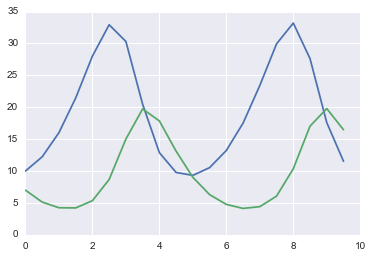

In [36]:
plt.plot(time, r)
plt.plot(time, f)

In [44]:
r_axis = np.arange(start=0, stop=30, step=3)
f_axis = np.arange(start=0, stop=30, step=3)

In [45]:
r_axis

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [46]:
all_y = np.meshgrid(r_axis, f_axis)

In [47]:
all_r, all_f = all_y

In [48]:
all_r

array([[ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27]])

In [49]:
all_f

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
       [21, 21, 21, 21, 21, 21, 21, 21, 21, 21],
       [24, 24, 24, 24, 24, 24, 24, 24, 24, 24],
       [27, 27, 27, 27, 27, 27, 27, 27, 27, 27]])

In [52]:
dr, df = dydt(all_y, 0)

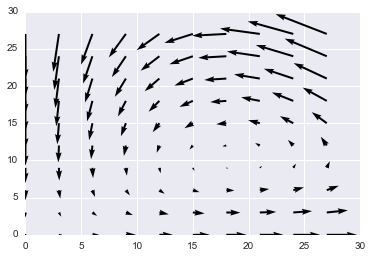

In [54]:
plt.quiver(all_r, all_f, dr, df)

Посчитаем длину стрелочек:

In [55]:
arrow_len = np.sqrt(dr ** 2 + df ** 2)

Заменяем нулевую длину на единичную, чтобы избежать проблем с делением на нулевую длину:

In [56]:
# to avoid division by zero
arrow_len[arrow_len == 0] = 1

Нормируем на длину:

In [57]:
drn = dr / arrow_len
dfn = df / arrow_len

Рисуем фазовый портрет:

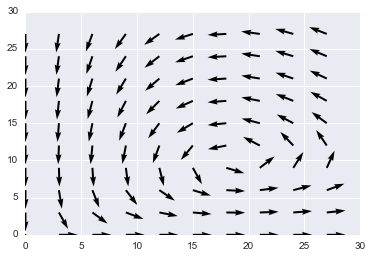

In [58]:
plt.quiver(all_r, all_f, drn, dfn)